In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from PIL import Image

In [0]:
import zipfile
with zipfile.ZipFile('/content/digit-recognizer.zip') as f:
    f.extractall('/content/digit')

In [0]:
path = Path('/content/digit')
(path/'data').mkdir(exist_ok =True)

In [0]:
df=pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')

In [0]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
path_tr = path/'data/Train'
path_tr.mkdir(exist_ok = True)
labels = df.loc[:,'label']
for label in np.unique(labels):
    (path_tr/str(label)).mkdir(exist_ok=True)
path_test = path/'data/Test'
path_test.mkdir(exist_ok = True)


In [0]:
from PIL import Image

In [0]:
def save_img(data,path_img):
    data = data.reshape(28,28)
    data = data.astype(np.uint8)
    img = Image.fromarray(data)
    img.save(path_img)

In [0]:
for idx,row in df.iterrows():
    label, data = row[0],row[1:]
    
    folder = path_tr/str(label)
    filename = f"{idx}.jpg"
    path_img = folder/filename
    
    data = data.values
    
    save_img(data, path_img)

In [0]:
for idx,row in df_test.iterrows():
    data = row[0:]
    
    folder = path_test
    filename = f"{idx}.jpg"
    path_img = folder/filename
    
    data = data.values
    
    save_img(data, path_img)

Loading into Databunch


In [0]:
src = ImageList.from_folder(path_tr).split_by_rand_pct(0.2).label_from_folder()

In [0]:
def get_data(size=28):
    tfms = ([*rand_pad(padding=3, size=size, mode='zeros')], [])
    return src.transform(tfms).add_test_folder(path_test).databunch(bs = 48).normalize(imagenet_stats)

In [0]:
src

LabelLists;

Train: LabelList (33600 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /content/digit/data/Train;

Valid: LabelList (8400 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
8,4,7,8,9
Path: /content/digit/data/Train;

Test: None

In [0]:
data = get_data()

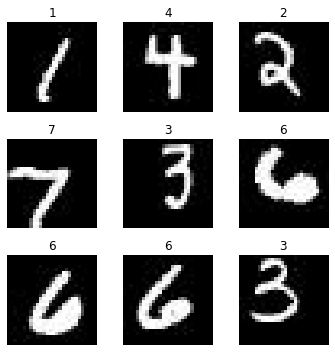

In [0]:
data.show_batch(3,figsize=(5,5))

Data augmentation


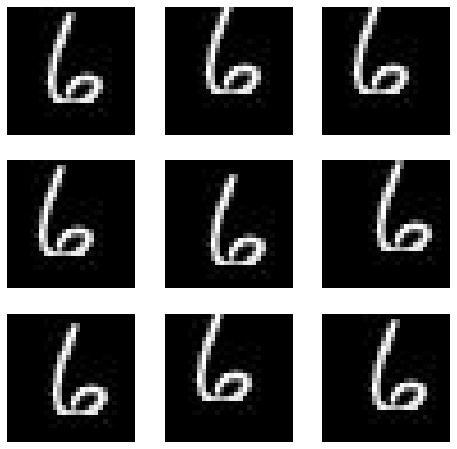

In [0]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [0]:
learn = cnn_learner(data,models.resnet18,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


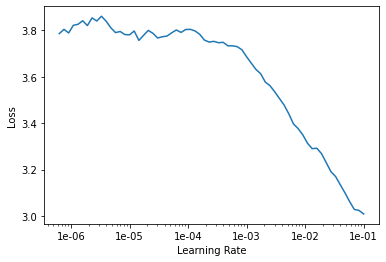

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end =15)

In [0]:
learn.fit_one_cycle(4,2e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.373875,0.306017,0.912262,00:26
1,0.252407,0.152793,0.951786,00:26
2,0.141495,0.050824,0.985595,00:26
3,0.092038,0.037284,0.989167,00:26


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


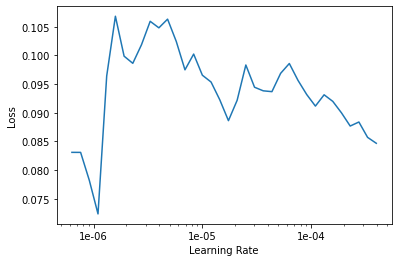

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4,1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.078467,0.037989,0.989048,00:29
1,0.076997,0.037174,0.988690,00:29
2,0.084473,0.037549,0.989405,00:29
3,0.086680,0.036461,0.989405,00:29


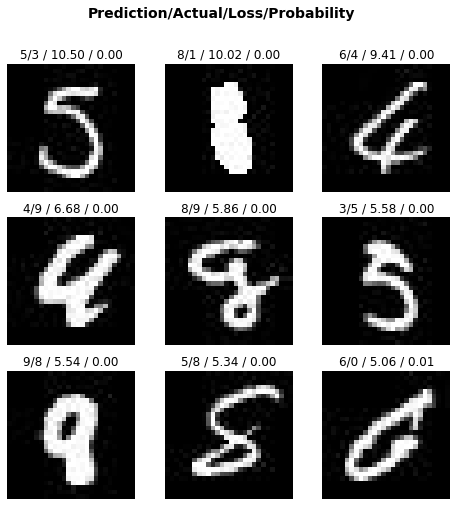

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9,figsize=(8,8))

In [0]:
score,_ = learn.get_preds(DatasetType.Test)

In [0]:
score.shape,

(torch.Size([28000, 10]),)

In [0]:
score[1]

tensor([5.5333e-09, 1.0000e+00, 2.6907e-09, 3.2932e-08, 3.1603e-09, 6.9556e-10,
        4.7907e-08, 8.0769e-08, 1.0927e-08, 2.1475e-08])

In [0]:
preds = np.argmax(score,axis=1)
preds.shape

torch.Size([28000])

In [0]:
preds[1]

tensor(1)

In [0]:
submission = pd.DataFrame()

In [0]:
submission_1 = pd.DataFrame(preds)

In [0]:
submission_1.to_csv(Path('/content/submission.csv'))

In [0]:
learn  = cnn_learner(data,models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


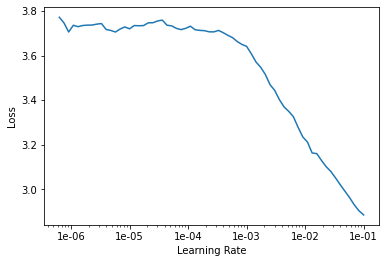

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end =15)

In [0]:
learn.fit_one_cycle(6,3e-02)

epoch,train_loss,valid_loss,accuracy,time


TypeError: ignored